# R Graphics

## The main plot function

The `plot` function is the main plotting tool in R. A typical call will be `plot(x, y, opt1 = val1, opt2 = val2, ...)` where `opt1`, `opt2`, etc are plotting options. Some useful plotting options are (see `?plot.default` and `?par` for a full list of options)

 - `type` The type of the plot (a character). Possible values include
    - `"p"` for points (i.e. a scatterplot, the default);
    - `"l"` for lines (piecewise linear interpolant);
    - `"b"` for both points and lines;
    - `"n"` for plotting nothing. This option draws only the axes and is useful when we want to plot multiple objects on the same axes.
 - `xlim` and `ylim` The limits of the axes (a vector of length 2).
 - `xlab`, `ylab`, `main` Titles for the axes and main title (a character string).
 - `col`* The colour of the points or lines. This can be specified in a number of ways. See relevant section below.
 - `pch`* The plot style for points (relevant if `type` is `"p"` or `"b"`). This can be specified as a number or a single character string.
 - `lty`* The line style (relevant if `type` is `"l"` or `"b"`). This can be specified as a number or a name.
 - `lwd`* The width of points or lines. The default value is 1. Higher numbers give thicker (bolder) points and lines.

    \* Graphical parameter, can also be set globally using `par`.
    
Depending on whether `x` and `y` are numerical or categorical, the appropriate plot will be displayed. 

|  `x` type   |  `y` type   |  Default plot |
|------------:|------------:|--------------:|
| numerical   | numerical   | scatterplot   |
| categorical | numerical   | boxplot       |
| numerical   | categorical | spineplot     |
| categorical | categorical | spineplot     |
                          
                          


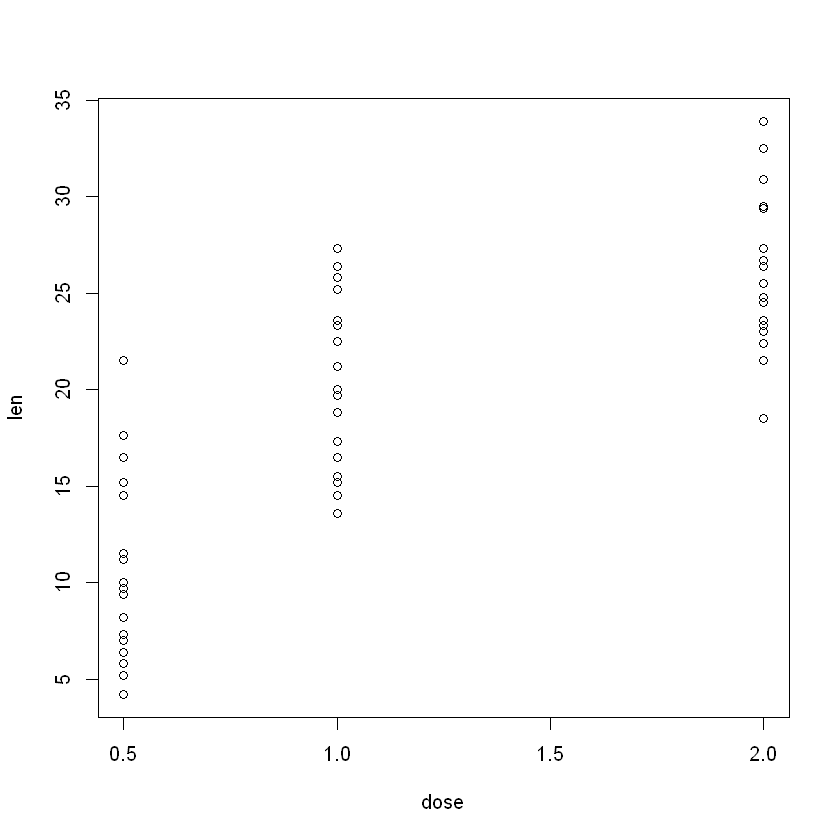

In [1]:
attach(ToothGrowth) # Add ToothGrowth data to path so we can plot its variables See ?ToothGrowth for more information
plot(dose, len)

## Plotting devices

When a plotting function is called, the graph appears in what in the R language is called a "device". If a device is open, then the plot appears on that device (and may overwrite the existing plot), otherwise the default device will be opened. The user can open a plotting device before running the plotting function. This can be useful if you don't want to overwrite the existing plot or if you want to export the plot. A device is opened by calling the device function (see below) and is closed by running `dev.off()`. Note that if you are plotting to a device that writes to a file, unless `dev.off()` is called, the plot won't be created. Some useful device functions are (see `?Devices` for a complete list):

 - `X11()` Opens a new plotting window. This is useful to avoid overwriting an existing plot;
 - `postscript(file = "myfig.eps", ...)` and `pdf(file = "myfig.pdf", ...)` These functions are useful for exporting plots. For example to export to the eps format suitable for importing into latex a typical call will be

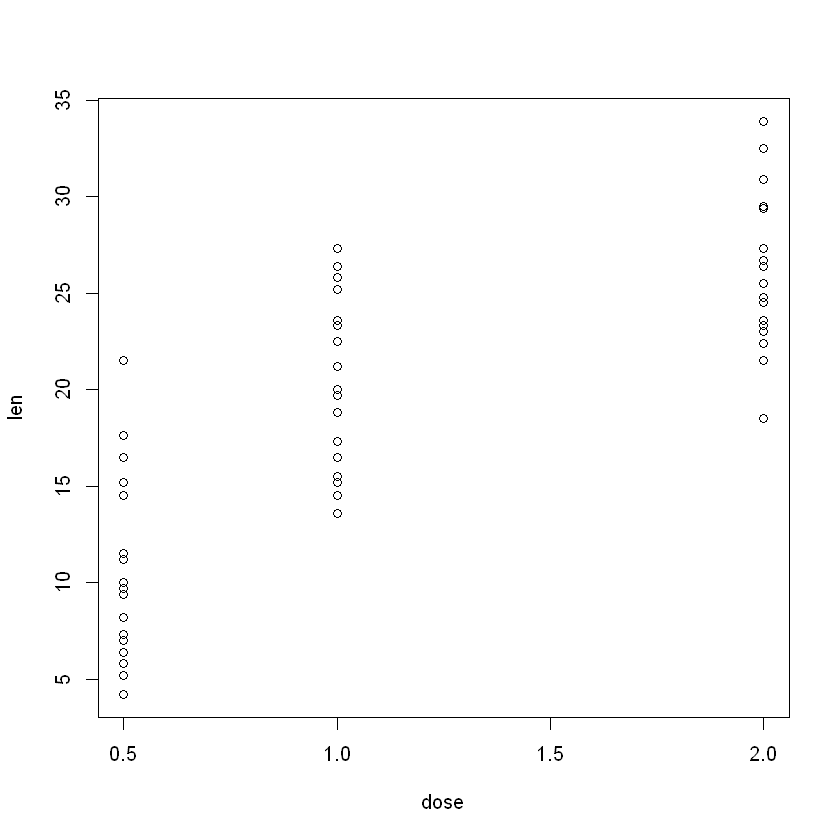

In [2]:
# Uncomment lines to export plots
# postscript("myfig.eps", width = 4.0, height = 3.0, paper = "special",
#            horizontal = FALSE, family = "ComputerModern", encoding = "TeXtext.enc")
plot(dose, len)
#dev.off()

## Graphical parameters

Graphical parameters are options controlling different parts of the plotting device.  These are global plotting options which remain active as long as the plotting device is open. They can be set using the function `par`, e.g. `par(opt1 = val1, opt2 = val2, ...)`. Some graphical parameters can also be specified for individual plotting calls (see e.g. the arguments to the `plot` function). Some additional useful graphical parameters are

 - `mfrow` A vector of positive integers of length 2. This is used to split the graphic device into several subplots. For example, the call `par(mfrow = c(2, 3))` splits the device into 2 rows and 3 columns, the 6 plots will appear row-wise. 
 - `col` The plotting colour. This can be specified as a number (1 is black, 2 is red, 3 is green, 4 is blue, etc) or as a name (type `colors()` in R for a list of all names).
 - `pch` The plotting character for points. This can be specified as an integer or a length-one character string. See `?pch` for possible values.
 - `lty` The line type. This can be specified as an integer or a 
 character string. (0=blank, 1=solid (default), 2=dashed, 3=dotted, 4=dotdash, 5=longdash, 6=twodash)

When calling the function `par`, a new device will be opened if none is available. A typical command sequence when wanting to set specific plotting parameters is as follows.

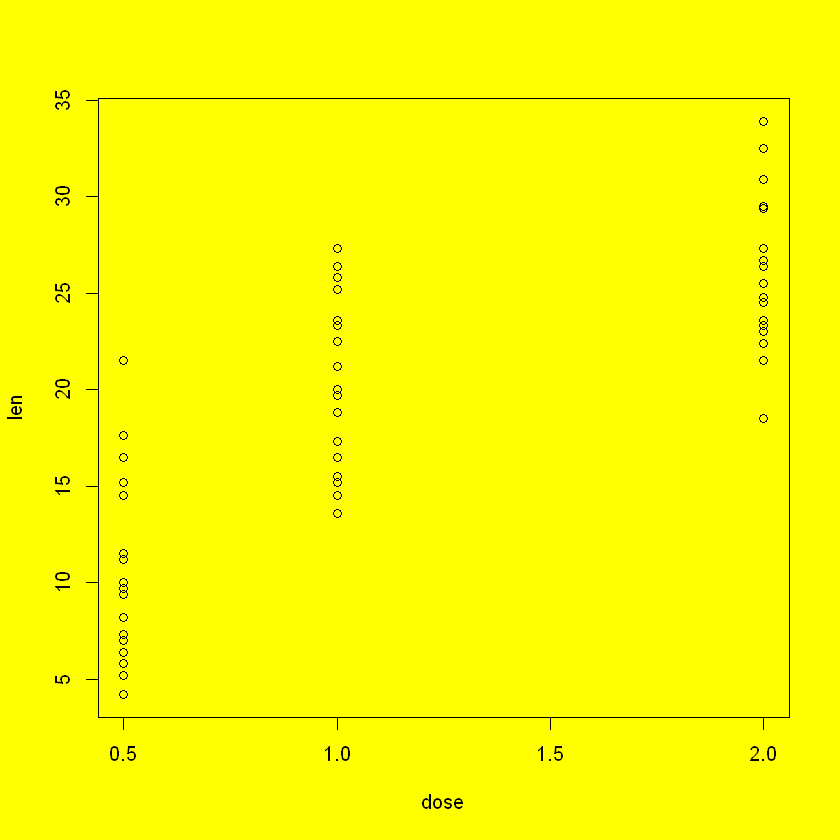

In [3]:
# Uncomment lines to export plots
# pdf(file = "myfile.pdf") # Open the plotting device
par(bg = "yellow") # Set the graphical parameter, in this case the background colour
plot(dose, len) # Create the plot
# dev.off() # Close the plotting device, necessary if exporting the plot

Here is another example which plots available R colours. It makes use of the function `grep` to remove redundant names, the function `polygon` to draw a coloured rectangle, and the function `text` to add text to a plot.

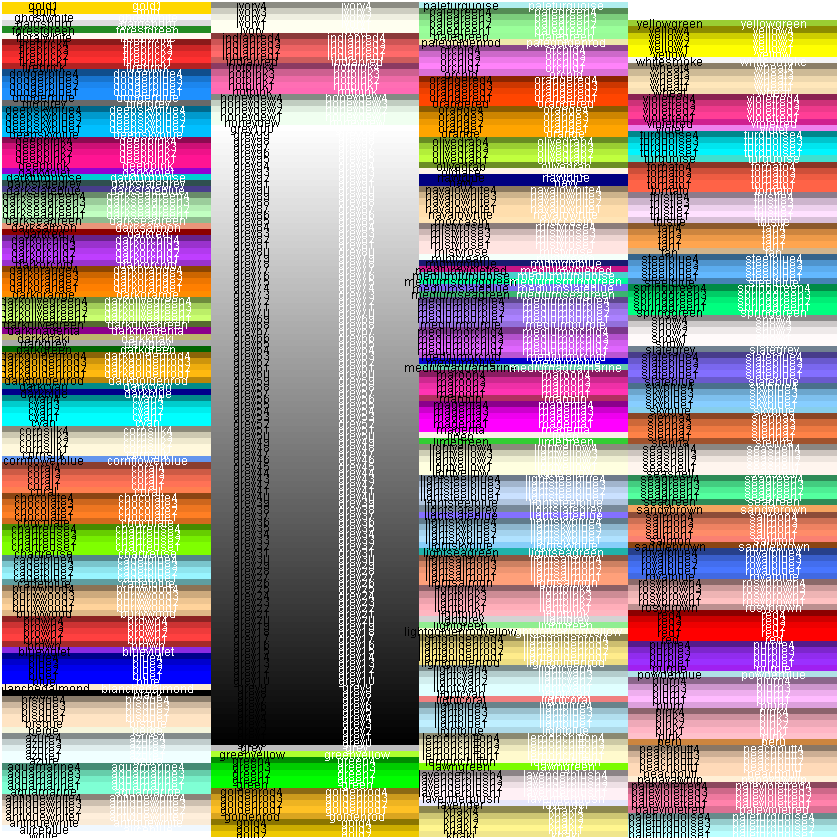

In [4]:
# Uncomment lines to export plots

clall = colors()
cl = grep("gray", clall, value = TRUE, invert = TRUE) # Remove entries containing 'gray' since there are duplicates with 'grey' 
ncl = length(cl) # Number of colours
ncol = 4 # Number of columns
nrow = ceiling(ncl/ncol) # Number of rows
# pdf("Rcols.pdf", width = 7, height = 30)
par(mar = c(.1, .1, .1, .1), ann = FALSE, xaxs = "i", yaxs = "i") # Conserve space
plot(c(0,ncol), c(0,nrow), type = "n", axes = FALSE) # Draw the plot area, plot nothing
for (i in 1:ncl) {
  row = (i-1) %% nrow        # Row position
  col = ceiling(i/nrow) - 1  # Column position
  polygon(c(0, 0, 1, 1) + col, c(0, 1, 1, 0) + row , col = cl[i], border = NA) # Draw a coloured box
  text(.2 + col, .5 + row , cl[i], col = "black", cex = .6) # Display colour name
  text(.7 + col, .5 + row, cl[i], col = "white", cex = .6)  # Display colour name
}
#dev.off()

## Exercise: 1
Use the ToothGrowth data.
On the same plotting window create two separage graphs side by side using the par() command.
1. On the first one plot length against dose as above but using red squares as plotting symbols instead of black circles. Label your x and y axes "Dose" and "Length" respectively. Add also a title to the plot. 
2. On the second graph plot length against supplement. Label the x and y axes and the graph accordingly.

[Solution]()

## Solution+: 1
Use the ToothGrowth data.
On the same plotting window create two separage graphs side by side. 
1. On the first one plot length against dose as above but using red squares as plotting symbols instead of black circles. Label your x and y axes "Dose" and "Length" respectively. Add also a title to the plot. 
2. On the second graph plot length against supplement as a boxplot (boxplot is the default for these data types). Label the x and y axes and the graph accordingly.

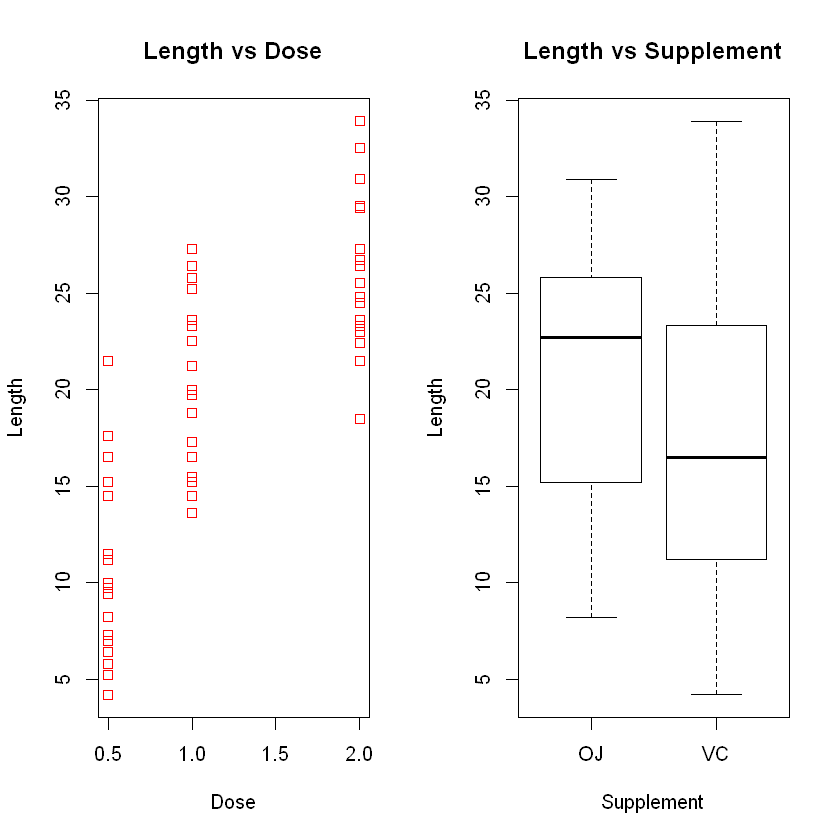

In [5]:
par(mfrow = c(1, 2))
plot(dose, len, type = "p", pch = 0, col = "red", xlab = "Dose", ylab = "Length", main = "Length vs Dose")
plot(supp, len, xlab = "Supplement", ylab = "Length", main = "Length vs Supplement")

:Solution+

## Adding elements to an existing plot

### Points, lines, etc

The function `points` operates on an existing plot by adding new points to it. A typical call will be `points(x, y, opt1 = val1, opt2 = val2, ...)` where `opt1`, `opt2`, etc are plotting options. Options include `type` as in function `plot` and the other graphical parameter options also available for `plot`. 

The call `lines(x, y)` is a synonym for `points(x, y, type = "l")`.

### Straight lines

The function `abline` is used for adding straight lines to an existing plot. A call to the function can be of the form

 - `abline(a = 1, b = 3)` Will draw the line $y = a + b x$.
 - `abline(h = c(1, 2, 3))` or `abline(v = c(-1, 0))` Will draw horizontal or vertical lines at the specified points.

### Adding a legend

The function `legend` adds a legend to an existing plot. A typical call to the function is 

 - `legend(x = xcoord, y = ycoord, legend = ..., opt1 = val1, opt2 = val2, ...)`
 - `legend(x = keyword, legend = ..., opt1 = val1, opt2 = val2, ...)`

The position of the legend can be specified by a keyword: `"top"`, `"topright"`, `"right"`, `"center"`, etc.

## Exercise: 2 
Recreate the plot of length against dose, incorporating the following changes:
1. Change the axis labels to "Dose" and "Length".
2. Use different colours and plotting symbols for the two different supplements. *Hint.* Use `dose[supp == "OJ"]` to select the elements of `dose` which correspond to `supp = OJ`.
3. Draw the regression line of length against dose. The coefficients of the regression line $\alpha + \beta x$ can be obtained using the following formulae: $\hat{\beta} = cor(x,y) \times sd(y)/sd(x)$, $\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$. 
4. Add a legend to your plot explaining each component of the graph.

[Solution]()

## Solution+: 2
Recreate the plot of length against dose, incorporating the following changes:

1. Change the axis labels to "Dose" and "Length". 
2. Use different colours and plotting symbols for the two different supplements. Hint. Use `dose[supp == "OJ"]` to select the elements of `dose` which correspond to `supp = OJ`. 
3. Draw the regression line of length against dose. The coefficients of the regression line  $\alpha + \beta x$  can be obtained using the following formulae:  $\hat{\beta} = cor(x,y) \times sd(y)/sd(x)$, $\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$. 
4. Add a legend to your plot explaining each component of the graph.

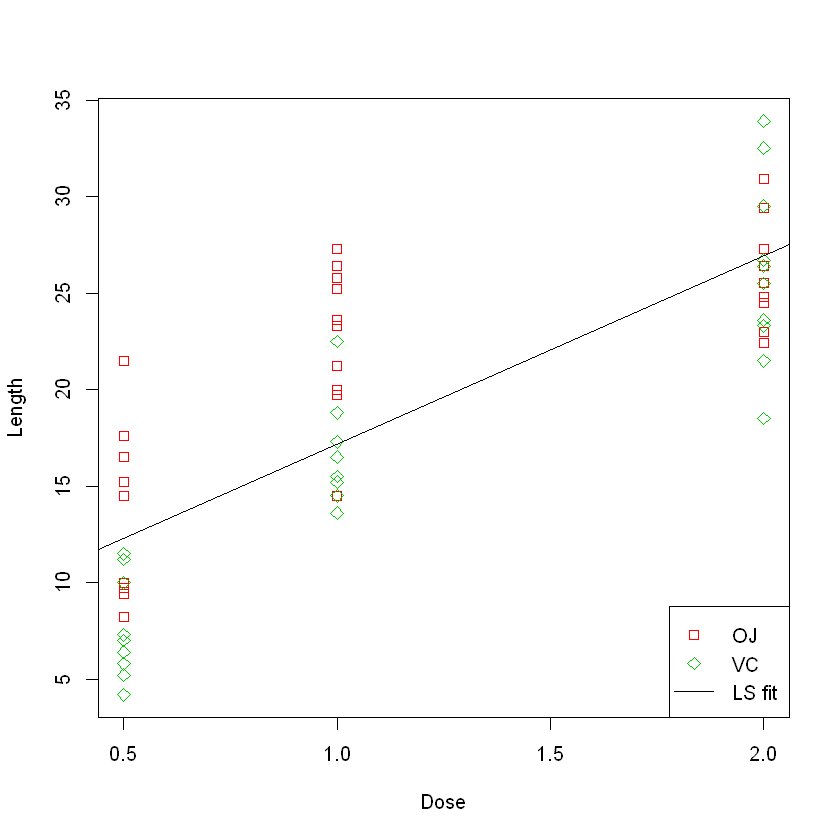

In [6]:
plot(dose, len, type = "n", xlab = "Dose", ylab = "Length") # Draw the axes only
points(dose[supp == "OJ"], len[supp == "OJ"], col = 2, pch = 0)
points(dose[supp == "VC"], len[supp == "VC"], col = 3, pch = 5)
bhat = cor(dose,len)*sd(len)/sd(dose)
ahat = mean(len) - bhat*mean(dose)
abline(ahat, bhat)
legend("bottomright", legend = c("OJ", "VC", "LS fit"), pch = c(0, 5, NA),
       lty = c(NA, NA, 1), col = c(2, 3, 1))

## Plotting on the 2D plane 

A number of functions are used for drawing on the 2D plane. These have the general call `fcn(x, y, z, opt1 = val1, opt2 = val2, ...)` where `x` and `y` are numeric vectors of coordinates on the 2D plane **with elements in increasing order** and `z` is a matrix with as many rows as the elements of `x` and as many columns as the elements of `y`. The `[i, j]` element of `z` corresponds to `z[i, j] = z(x[i], y[j])`.

These functions are 

 - `image(x, y, z, ...)` and `contour(x, y, z, ...)` Creates an image and contour plot respectively. The optional argument `add`, if set to `TRUE`, will not overwrite an existing plot. 
 - `persp(x, y, z, ...)` Draws a surface over the 2D plane.

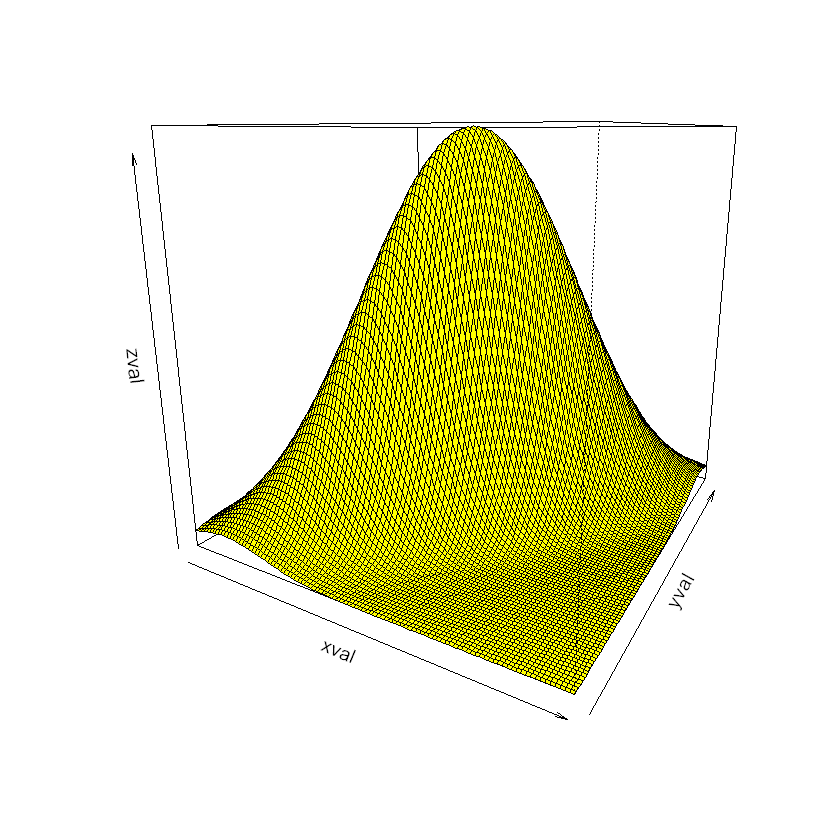

In [7]:
## Plot of the bivariate standard normal distribution density
dbsnorm = function(x, y, rho) {
  nx = length(x)
  ny = length(y)
  xmat = matrix(x, nx, ny)
  ymat = t(matrix(y, ny, nx)) # t() gives the transpose of a matrix
  (1/(2*pi*sqrt(1-rho^2))) * exp(- .5 * (xmat^2 + ymat^2 - 2*rho*xmat*ymat))
}
sval = seq(-4, 4, length.out = 101) # Range of standard normal values
xval = sval
yval = sval
zval = dbsnorm(sval, sval, rho = 0.8)
persp(xval, yval, zval, theta = 30, col = "yellow")


:Solution+

## Exercise: 3
Consider the data generated using the following R commands
```{r, eval = FALSE}
n <- 500
x <- rnorm(n, mean = 1, sd = 2)
y <- 2*x + rnorm(n, mean = 0, sd = 3)
```
1. Draw a scatterplot of `y` against `x`.
2. Overlay the scatterplot with a contour plot of the true joint distribution of `x` and `y` in red colour.

*Hint.* If $(Z_1, Z_2)$ are bivariate standard normally distributed with correlation $\rho$, then $(X_1, X_2)$ where $X_1 = \mu_1 + \sigma_1 Z_1$ and $X_2 = \mu_2 + \sigma_2 Z_2$ are bivariate normally distributed with correlation $\rho$, mean $(\mu_1, \mu_2)$ and standard deviations $\sigma_1$ and $\sigma_2$. Then the density of $(X_1, X_2)$ is $$\frac{1}{\sigma_1 \sigma_2} f_{(Z_1,Z_2)}\biggl( \frac{x_1 - \mu_1}{\sigma_1}, \frac{x_2 - \mu_2}{\sigma_2} ; \rho \biggr)$$
 where $f_{(Z_1,Z_2)}(z_1,z_2;\rho)$ is the density of $(Z_1,Z_2)$.
 
 [Solution]()

## Solution+: 3  
Consider the data generated using the following R commands
```{r, eval = FALSE}
n <- 500
x <- rnorm(n, mean = 1, sd = 2)
y <- 2*x + rnorm(n, mean = 0, sd = 3)
```
1. Draw a scatterplot of `y` against `x`.
2. Overlay the scatterplot with a contour plot of the true joint distribution of `x` and `y` in red colour.

*Hint.* If $(Z_1, Z_2)$ are bivariate standard normally distributed with correlation $\rho$, then $(X_1, X_2)$ where $X_1 = \mu_1 + \sigma_1 Z_1$ and $X_2 = \mu_2 + \sigma_2 Z_2$ are bivariate normally distributed with correlation $\rho$, mean $(\mu_1, \mu_2)$ and standard deviations $\sigma_1$ and $\sigma_2$. Then the density of $(X_1, X_2)$ is $$\frac{1}{\sigma_1 \sigma_2} f_{(Z_1,Z_2)}\biggl( \frac{x_1 - \mu_1}{\sigma_1}, \frac{x_2 - \mu_2}{\sigma_2} ; \rho \biggr)$$
 where $f_{(Z_1,Z_2)}(z_1,z_2;\rho)$ is the density of $(Z_1,Z_2)$.

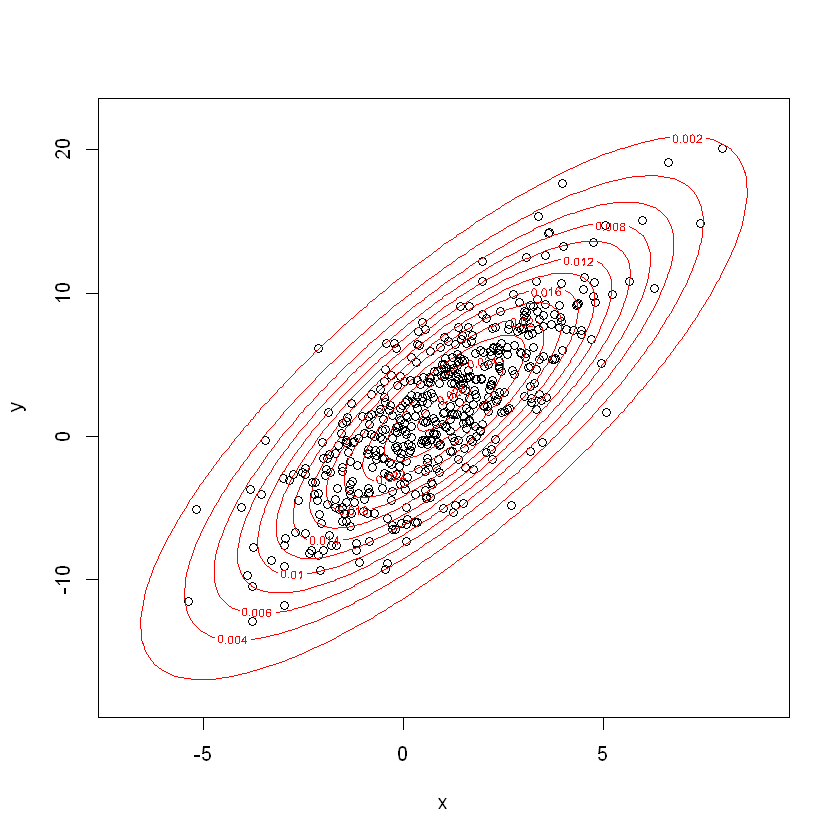

In [8]:
n = 500
x = rnorm(n, mean = 1, sd = 2)
y = 2*x + rnorm(n, mean = 0, sd = 3)

plot(x, y, xlim = c(-7, 9), ylim = c(-18, 22))
sval = seq(-4, 4, length.out = 101) # Range of standard normal values
xval = 1 + 2*sval
yval = 2 + 5*sval
zval = dbsnorm(sval, sval, rho = 8/(2*5))/(2*5)
contour(xval, yval, zval, add = TRUE, col = "red")

:Solution+

## Information: Further reading

Below are some other useful plotting features of R.

 - See `?plotmath` for mathematical annotation of figures.
 - Use the `text` function for adding text to figures.
 - The function `hist` plots a histogram.
 - Packages such as `lattice` and `ggplot2` provide additional plotting functions.
 - The package `rgl` can be used to create 3D interactive graphs.